# Python-标准库calendar的使用
Ref: https://docs.python.org/3/library/calendar.html

根据Python文档：本模块让你可以输出像 Unix cal 那样的日历，它还提供了其它与日历相关的实用函数。 默认情况下，这些日历把星期一当作一周的第一天，星期天为一周的最后一天（按照欧洲惯例）。 可以使用 setfirstweekday() 方法设置一周的第一天为星期天 (6) 或者其它任意一天。 使用整数作为指定日期的参数。 更多相关的函数，参见 datetime 和 time 模块。

在这个模块中定义的函数和类都基于一个理想化的日历，现行公历向过去和未来两个方向无限扩展。这与 Dershowitz 和 Reingold 的书 "历法计算" 中所有计算的基本日历 -- "proleptic Gregorian" 日历的定义相符合。 ISO 8601标准还规定了 0 和 负数年份。0年指公元前1年， -1年指公元前2年，依此类推。

本文不准备介绍calendar中所有的东西，只是通过一些有趣的代码例子来介绍大部分的常用的用法


In [120]:
import calendar

In [121]:
calendar.firstweekday()

6

# 1. 打印日历

首先来看看能用这个库做什么。我觉得首先打印日历是最直观地能感受到这个模块的威力的功能了。

## month(theyear, themonth, w=0, l=0)

将一个月的日历转换为一个字符串，theyear指定年份，themonth指定月份。

w指定列间隔,缺省值为0.但是内部已做处理，设定值小于等于2按2处理。

l指定行间隔,缺省值为0.但是内部已做处理，设定值小于等于1按1处理。


## prmonth(theyear, themonth, w=0, l=0)

与month()的参数含义完全相同，功能也相同。只不过，month只是返回表示指定的月的日历的字符串，而prmonth直接打印出来了。

因此可以认为：prmonth = print + month,其中pr就是print的缩写，好直白

In [122]:
calendar.prmonth(2021,11)

   November 2021
Su Mo Tu We Th Fr Sa
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30


In [123]:
thismonth = calendar.month(2021,11,0)
print(thismonth)

<class 'str'>
   November 2021
Su Mo Tu We Th Fr Sa
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30



month的输出其实就可以看成是一个排好版的字符串。以如下方式显示的化就清楚地看出来它就是一个内嵌了换行符的字符串而已。

In [141]:
print(type(thismonth)) # thismonth的类型是字符串
thismonth

<class 'str'>


'   November 2021\nSu Mo Tu We Th Fr Sa\n    1  2  3  4  5  6\n 7  8  9 10 11 12 13\n14 15 16 17 18 19 20\n21 22 23 24 25 26 27\n28 29 30\n'

通过w和l参数可以调节行间隔和列间隔，如下所示。由以下例子也可以清楚地看出，w调节列间隔只有在设定大于2时才有效。小于等于2时效果跟不设置相同。l的设置效果与此相似。

In [124]:
calendar.prmonth(2021,11,0)
calendar.prmonth(2021,11,1)
calendar.prmonth(2021,11,2) # w = 0,1,2 have the same effect.
calendar.prmonth(2021,11,3) # w = 3 has the difference effect than w <= 2

   November 2021
Su Mo Tu We Th Fr Sa
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30
   November 2021
Su Mo Tu We Th Fr Sa
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30
   November 2021
Su Mo Tu We Th Fr Sa
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30
       November 2021
Sun Mon Tue Wed Thu Fri Sat
      1   2   3   4   5   6
  7   8   9  10  11  12  13
 14  15  16  17  18  19  20
 21  22  23  24  25  26  27
 28  29  30


与month()/prmonth()类似的还有calendar()/prcal()这一对，前者是输出一个月的日历，后面这一对是输出一整年的日历.
由于我们已经知道了prcal()与calendar()，以下就不特别举calendar()的例子了。

calendar.prcal(year, w=0, l=0, c=6, m=3)
其中w,l的含义与prmonth()相同（控制月内矩阵的列间距和行间距），c用于控制月间的列间距，m控制整个年历（以每个月作为一个元素的）列数.有意思的时，月间列间隔c与月内列间隔w对应，但是没有与月内行间隔l相对应的月间行间隔。

In [126]:
calendar.prcal(2021,c=8, m=4)
# print(calendar.calendar(2021)) # will produce the same result

                                                  2021

      January                     February                     March                       April
Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa
                1  2            1  2  3  4  5  6            1  2  3  4  5  6                     1  2  3
 3  4  5  6  7  8  9         7  8  9 10 11 12 13         7  8  9 10 11 12 13         4  5  6  7  8  9 10
10 11 12 13 14 15 16        14 15 16 17 18 19 20        14 15 16 17 18 19 20        11 12 13 14 15 16 17
17 18 19 20 21 22 23        21 22 23 24 25 26 27        21 22 23 24 25 26 27        18 19 20 21 22 23 24
24 25 26 27 28 29 30        28                          28 29 30 31                 25 26 27 28 29 30
31

        May                         June                        July                       August
Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa        Su Mo Tu We Th Fr Sa
             

有了这个，再来个彩打加持，是不是我就可以自己打印日历啦。。。。

# 2. 到底缺省以哪天为一周的第一天

根据“https://docs.python.org/3/library/calendar.html”，By default, these calendars have Monday as the first day of the week, and Sunday as the last (the European convention).即（按照欧洲惯例）缺省地以星期一为一周的第一天。。。

然而从代码运行结果来看其实并不是（难道是我理解错了？），如下调用函数firstweekday()可以输出当前是以哪一天为一周的第一天。其中0,1,2,...,6分别表示星期一，星期二，。。。，星期天。难道所以的以星期一为一周的第一天仅仅是指“用0表示星期一，而用6表示星期天”吗？

In [127]:
calendar.firstweekday()

6

如果想改变以哪天为一周的第一天的设定的话，可以用setfirstweekday()函数。而且为了使用方便，calendar模块定义枚举量{MONDAY, TUESDAY, WEDNESDAY, THURSDAY, FRIDAY, SATURDAY, SUNDAY}。如下例所示

In [128]:
print(calendar.MONDAY,calendar.TUESDAY,calendar.WEDNESDAY,calendar.THURSDAY,calendar.FRIDAY,calendar.SATURDAY,calendar.SUNDAY)
calendar.setfirstweekday(2)
print(calendar.firstweekday())
calendar.setfirstweekday(calendar.TUESDAY)
print(calendar.firstweekday())

0 1 2 3 4 5 6
2
1


改变了一周的第一天的设定，具体有什么影响呢？调用一下prmonth()就可以看出来了。

以下先将星期一设置为一周的第一天，因此打印出来的日历中每一行的第一列是星期一。写到这里我抬眼看了一下我桌子上摆的历年的好几本日历，都是以星期天为第一列。而我又点了下右下角看Windows的日历是怎样的，如下图所示，是以星期一为第一列。平时确实没有注意到过这一个差异^-^。联想到上面的“（按照欧洲惯例）缺省地以星期一为一周的第一天”的那句话，我想到了另外一种可能：calendar模块自动检测了当前运行终端所属国家地区，并根据当前国家地区的管理来设置了一周种第一天的内部缺省值。

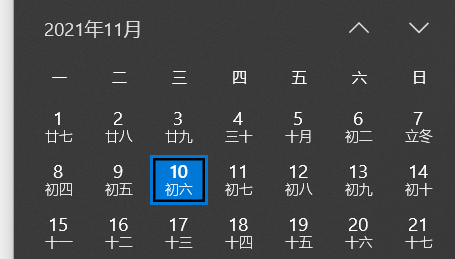

In [129]:
calendar.setfirstweekday(0)
calendar.prmonth(2021,11)

   November 2021
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30


# 3. 更方便数据处理的格式

以上month()或calendar()返回的结果是字符串的形式，从视角效果来看很好。但是并不利于数据处理需求，在数据处理中，更方便的数据格式是数组或者说矩阵等形式。calendar提供了对应于month()的但是输出为矩阵（2维数组的）函数，其中用0表示非日期的元素，如下所示：

In [130]:
calendar.setfirstweekday(firstweekday=calendar.SUNDAY)
a = calendar.monthcalendar(2021, 11)
a

[[0, 1, 2, 3, 4, 5, 6],
 [7, 8, 9, 10, 11, 12, 13],
 [14, 15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27],
 [28, 29, 30, 0, 0, 0, 0]]

# 4. 其它各种函数

(1) isleap(year)：判断指定是否是闰年，闰年为True，平年为False

(2) leapdays(y1, y2)：返回两个年份y1和y2(与python中的range()惯例相同,包含y1,不包含y2)中的闰年数.

(3) weekday(year, month, day)：返回指定的日期（年月日）对应的是星期几，日期有效设定从1970年起

(4) weekheader(n)：返回一星期中七天的英文缩写，n表示英文缩写所占的宽度

(5) monthrange(year, month)：返回指定年月份的第一天对应的星期几，以及该月有多少天

(6) calendar.timegm(tuple)：没看懂，不翻译了,反正暂时用不到^-^
An unrelated but handy function that takes a time tuple such as returned by the gmtime() function in the time module, and returns the corresponding Unix timestamp value, assuming an epoch of 1970, and the POSIX encoding. In fact, time.gmtime() and timegm() are each others’ inverse.

In [131]:
print(calendar.isleap(2018))        # 2018年是平年，所以为False
print(calendar.isleap(2008))        # 2008年是如年，所以为True

False
True


In [132]:
print(calendar.leapdays(2010, 2021)) # 2012，2016，2020年是闰年
print(calendar.leapdays(1900, 2021))

3
30


In [133]:
print(calendar.weekday(2021, 11, 10))

2


In [134]:
calendar.setfirstweekday(firstweekday=calendar.SUNDAY)
print(calendar.weekheader(6))
print(calendar.monthrange(2021, 11)) #2021年11月01日是星期一，当月有30天

 Sun    Mon    Tue    Wed    Thu    Fri    Sat  
(0, 30)


# 5. 属性

The calendar module exports the following data attributes:

calendar.day_name

An array that represents the days of the week in the current locale.

calendar.day_abbr

An array that represents the abbreviated days of the week in the current locale.

calendar.month_name

An array that represents the months of the year in the current locale. This follows normal convention of January being month number 1, so it has a length of 13 and month_name[0] is the empty string.

calendar.month_abbr

An array that represents the abbreviated months of the year in the current locale. This follows normal convention of January being month number 1, so it has a length of 13 and month_abbr[0] is the empty string.

翻译起来太费劲，看实例输出能更清楚地看出它们都是代表什么

In [135]:
print(calendar.day_name)
print(list(calendar.day_name))

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [136]:
print(calendar.day_abbr)
print(list(calendar.day_abbr))

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [137]:
print(calendar.month_name)
print(list(calendar.month_name))

['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [138]:
print(calendar.month_abbr)
print(list(calendar.month_abbr))

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


有点奇怪的是，month_name和month_abbr的输出中前面有一个空字符串，这是在提醒老板要发年终双薪嘛。。。

In [139]:
from datetime import datetime
date_string = "2006/01/01"
print("date_string =", date_string)
 
date_object = datetime.strptime(date_string, "%Y/%m/%d")
print("date_object =", date_object)
print(type(date_object))
print(date_object.year, date_object.month, date_object.day)

date_string = 2006/01/01
date_object = 2006-01-01 00:00:00
<class 'datetime.datetime'>
2006 1 1


In [140]:
type(date_object)

datetime.datetime

# 4. calendar模块的构成

最后来说说calendar模块的构成，本模块的真正的核心其实是以下几个class的实现。但是，这里（本文只当是初阶入门介绍）就不搬运了，需要更高深运用的小伙伴自行读文档吧^-^.
class calendar.Calendar(firstweekday=0)
class calendar.TextCalendar(firstweekday=0)
class calendar.HTMLCalendar(firstweekday=0)
class calendar.LocaleTextCalendar(firstweekday=0, locale=None)
class calendar.LocaleHTMLCalendar(firstweekday=0, locale=None)

而以上所介绍的那些函数相当于是一个简易的使用接口(For simple text calendars this module provides the following functions.)
